In [3]:
'''
機率 (Probability)
'''
# check both probabilities of girl's birth
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print("P(both | older): %.4f" % (both_girls / older_girl))
print("P(both | either): %.4f" % (both_girls / either_girl))

P(both | older): 0.5007
P(both | either): 0.3312


均勻分布 : 1
累積密度函數 : 0.4
常態分佈 : 0.3332


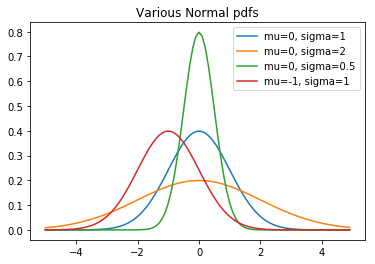

In [5]:
'''
均勻分布 (uniform distribution)
'''
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

print("均勻分布 :", uniform_pdf(0.6))


'''
累積密度函數 (cdf)
'''
def uniform_cdf(x):
    '''
    送回均勻隨機變數 <= x的機率
    '''
    if x < 0:    return 0    # 均勻隨機變數絕不會小於 0
    elif x < 1:  return x    # 例如 P(X <= 0.4) = 0.4
    else:        return 1    # 均勻隨機變數永遠小於 1
    
print("累積密度函數 :", uniform_cdf(0.4))


'''
常態分布 (normal distribution)
'''
# 機率密度函數 pdf
from matplotlib import pyplot as plt
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma **2) / (sqrt_two_pi * sigma))

print("常態分佈 : %.4f" % normal_pdf(0.6, mu=0, sigma=1))


xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

常態分佈 : 0.7881


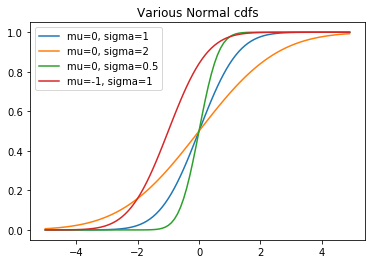

In [10]:
# 累積密度函數 cdf
# use "math.erf" to simply comprehension cdf
from matplotlib import pyplot as plt
import math

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

print("常態分佈 : %.4f" % normal_cdf(0.8, mu=0, sigma=1))


xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal cdfs")
plt.show()

In [15]:
'''
二元搜尋法 (binary search)
'''
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    '''
    用二元搜尋法逆向求出近似值
    '''
    # 如果不是標準常態分佈，就先轉換成標轉常態分佈
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p   = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            # 中點的值還太低，就往上繼續搜尋
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # 中點的值還太高，就往下繼續搜尋
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
        return mid_z
    
print("binary search :", inverse_normal_cdf(0.7, mu=0, sigma=1, tolerance=0.00001))

binary search : 0.0


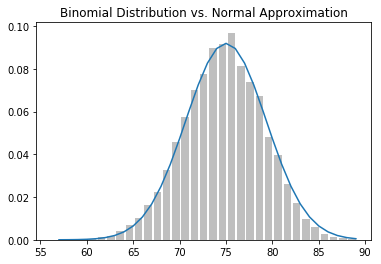

make_hist : None


In [26]:
'''
中央極限定理 (central limit theory)
'''
from matplotlib import pyplot as plt
from collections import Counter
import random

# 二項式隨機變數 Bernoulli_trial
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

# 伯努利隨機變數 Bernoulli
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

# 畫成圖形
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # 用長條圖呈現二項式取樣的實際結果
    histogram = Counter(data)
    plt.bar([x- 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color = '0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # 用折線圖顯示常態近似結果
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
print("make_hist :", make_hist(0.75, 100, 10000))